In [1]:
# importa dependencias
import pandas as pd
import matplotlib.pyplot as plt

## Tratamento dos dados

In [41]:
# carrega os dados
indexData = pd.read_csv('indexData.csv')
indexData.head(3)

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0


In [42]:
# verifica consistencias dos dados
indexData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


In [43]:
# tranforma para dados datetime
indexData['Date'] = pd.to_datetime(indexData['Date'])
indexData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Index      112457 non-null  object        
 1   Date       112457 non-null  datetime64[ns]
 2   Open       110253 non-null  float64       
 3   High       110253 non-null  float64       
 4   Low        110253 non-null  float64       
 5   Close      110253 non-null  float64       
 6   Adj Close  110253 non-null  float64       
 7   Volume     110253 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.9+ MB


In [48]:
# filtra index inexistente
indexData = indexData[(indexData['Index'] != '000001.SS') & (indexData['Index'] != '399001.SZ') & (indexData['Index'] != 'J203.JO')]
# remove valores faltantes
indexData.dropna(axis=0, inplace=True)
# reseta indexes
indexData.reset_index(inplace=True, drop=True)
# otimiza uso da memoria
indexData['Index'] = indexData['Index'].astype('category')
indexData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96356 entries, 0 to 96355
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Index      96356 non-null  category      
 1   Date       96356 non-null  datetime64[ns]
 2   Open       96356 non-null  float64       
 3   High       96356 non-null  float64       
 4   Low        96356 non-null  float64       
 5   Close      96356 non-null  float64       
 6   Adj Close  96356 non-null  float64       
 7   Volume     96356 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(6)
memory usage: 5.2 MB


In [58]:
# filtra apenas dados do HSI entre os anos 2015 a 2020
HSI = indexData[(indexData['Date'] >= '2015-01-01') & (indexData['Date'] <= '2020-12-31') & (indexData['Index'] == 'HSI')]
HSI

,Index,Date,Open,High,Low,Close,Adj Close,Volume
33551,HSI,2015-01-02,23699.19922,23998.90039,23655.50000,23721.30078,23721.30078,1.801713e+09
33552,HSI,2015-01-05,23699.18945,23998.86914,23655.51953,23721.32031,23721.32031,2.585193e+09
33553,HSI,2015-01-06,23515.13086,23611.00000,23312.50000,23485.41016,23485.41016,2.617977e+09
33554,HSI,2015-01-07,23396.69922,23715.71094,23332.02930,23681.25977,23681.25977,2.181070e+09
33555,HSI,2015-01-08,23920.34961,23941.64063,23719.05078,23835.52930,23835.52930,2.011643e+09
...,...,...,...,...,...,...,...,...
35024,HSI,2020-12-24,26342.86914,26470.40039,26221.30078,26386.56055,26386.56055,1.297803e+09
35025,HSI,2020-12-28,26288.36914,26514.08008,26264.32031,26314.63086,26314.63086,2.669630e+09
35026,HSI,2020-12-29,26490.44922,26618.77930,26432.91016,26568.49023,26568.49023,2.304707e+09
35027,HSI,2020-12-30,26695.10938,27159.47070,26670.97070,27147.10938,27147.10938,2.552803e+09


## Graficar o HSI (open) index ao longo do tempo

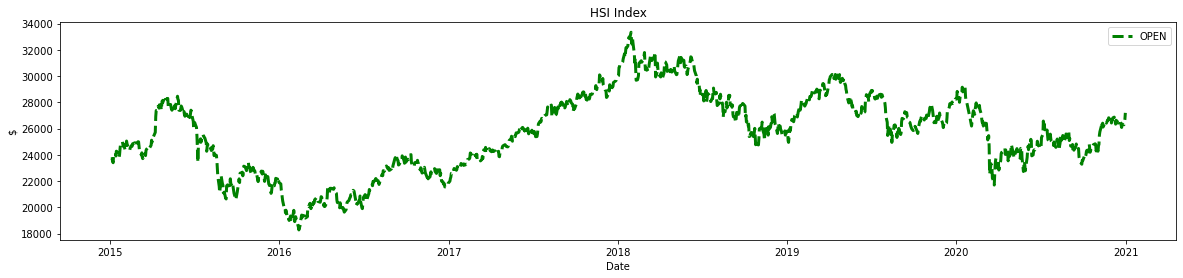

In [70]:
# gráfica Open vs tempo
plt.figure(figsize=(20,4))
plt.plot(HSI['Date'], HSI['Open'], label='OPEN', linewidth=3, color='green', linestyle='--')
plt.ylabel('$')
plt.xlabel('Date')
plt.title('HSI Index')
plt.legend()
plt.show()

In [73]:
# filtra apenas dados do GSPTSE entre os anos 2015 a 2020
GSPTSE = indexData[(indexData['Date'] >= '2015-01-01') & (indexData['Date'] <= '2020-12-31') & (indexData['Index'] == 'GSPTSE')]
GSPTSE

,Index,Date,Open,High,Low,Close,Adj Close,Volume
44046,GSPTSE,2015-01-02,14637.29981,14756.29981,14631.40039,14753.70020,14753.70020,1.329658e+10
44047,GSPTSE,2015-01-05,14709.00000,14709.00000,14339.50000,14392.70020,14392.70020,2.242136e+10
44048,GSPTSE,2015-01-06,14368.09961,14370.40039,14162.00000,14246.79981,14246.79981,2.733745e+10
44049,GSPTSE,2015-01-07,14324.40039,14427.40039,14265.70020,14285.00000,14285.00000,2.345226e+10
44050,GSPTSE,2015-01-08,14368.59961,14506.09961,14368.59961,14457.70020,14457.70020,2.258127e+10
...,...,...,...,...,...,...,...,...
45547,GSPTSE,2020-12-23,17586.90039,17652.69922,17583.59961,17593.59961,17593.59961,1.851618e+10
45548,GSPTSE,2020-12-24,17595.90039,17641.69922,17568.50000,17623.90039,17623.90039,9.598540e+09
45549,GSPTSE,2020-12-29,17610.50000,17661.19922,17512.19922,17543.40039,17543.40039,2.054068e+10
45550,GSPTSE,2020-12-30,17572.30078,17623.09961,17534.09961,17545.80078,17545.80078,1.595798e+10


## Graficar as ações HSI vs GSPTE ao longo do tempo

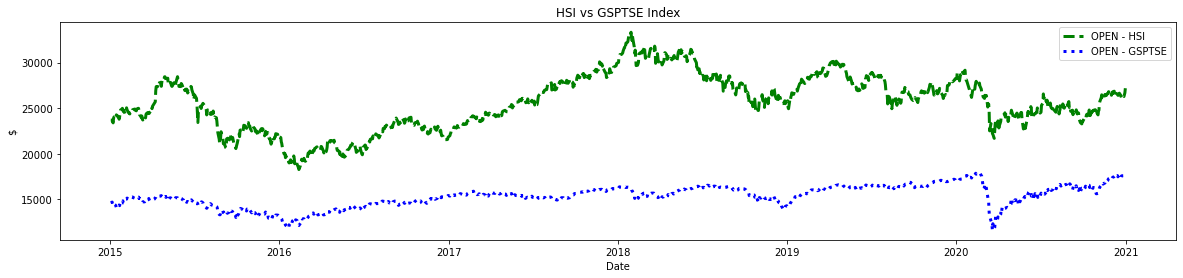

In [74]:
# gráfica HSI vs GSPTSE
plt.figure(figsize=(20,4))
plt.plot(HSI['Date'], HSI['Open'], label='OPEN - HSI', linewidth=3, color='green', linestyle='--')
plt.plot(GSPTSE['Date'], GSPTSE['Open'], label='OPEN - GSPTSE', linewidth=3, color='blue', linestyle=':')
plt.ylabel('$')
plt.xlabel('Date')
plt.title('HSI vs GSPTSE Index')
plt.legend()
plt.show()

## Graficar a ação HSI (open, close, high e close) ao longo do tempo

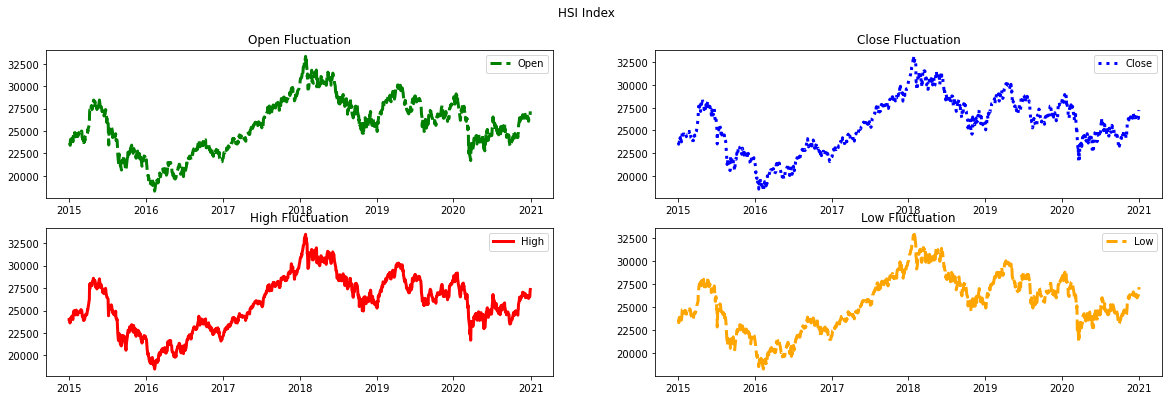

In [91]:
# grafica HSI
fig = plt.figure(figsize=(20,6))
fig.suptitle('HSI Index')
# grafica OPEN
fig.add_subplot(221)
plt.plot(HSI['Date'], HSI['Open'], label='Open', linewidth=3, color='green', linestyle='--')
plt.legend()
plt.title('Open Fluctuation')
# grafica CLOSE
fig.add_subplot(222)
plt.plot(HSI['Date'], HSI['Close'], label='Close', linewidth=3, color='blue', linestyle=':')
plt.title('Close Fluctuation')
plt.legend()
# grafica HIGH
fig.add_subplot(223)
plt.plot(HSI['Date'], HSI['High'], label='High', linewidth=3, color='red', linestyle='-')
plt.title('High Fluctuation')
plt.legend()
# grafica LOW
fig.add_subplot(224)
plt.plot(HSI['Date'], HSI['Low'], label='Low', linewidth=3, color='orange', linestyle='--')
plt.title('Low Fluctuation')
plt.legend()
# salva figura
plt.savefig('HSI_index.svg')
# mostra plot final
plt.show(fig)

## Comparar graficamente todas as ações (high) no ano 2015 

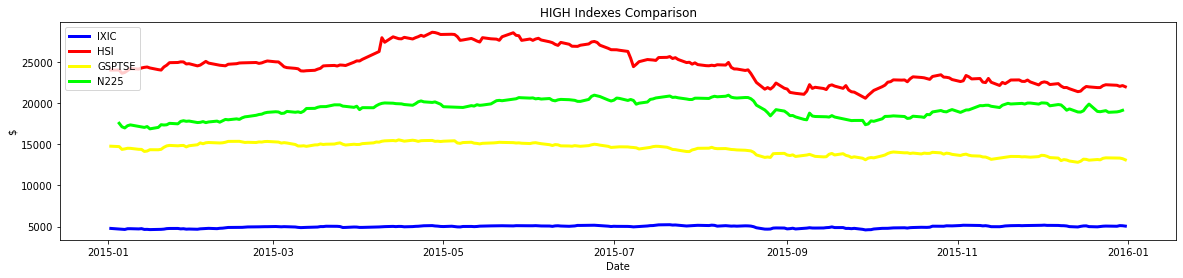

In [122]:
NYA = indexData[['Date','Index', 'High']][(indexData['Index'] == 'NYA') & (indexData['Date'] >= '2015-01-01') & (indexData['Date'] <= '2015-12-31')]
IXIC = indexData[['Date','Index', 'High']][(indexData['Index'] == 'IXIC') & (indexData['Date'] >= '2015-01-01') & (indexData['Date'] <= '2015-12-31')]
HSI = indexData[['Date','Index', 'High']][(indexData['Index'] == 'HSI') & (indexData['Date'] >= '2015-01-01') & (indexData['Date'] <= '2015-12-31')]
GSPTSE = indexData[['Date','Index', 'High']][(indexData['Index'] == 'GSPTSE') & (indexData['Date'] >= '2015-01-01') & (indexData['Date'] <= '2015-12-31')]
NSEI = indexData[['Date','Index', 'High']][(indexData['Index'] == 'NSEI') & (indexData['Date'] >= '2015-01-01') & (indexData['Date'] <= '2015-12-31')]
GDAXI = indexData[['Date','Index', 'High']][(indexData['Index'] == 'GDAXI') & (indexData['Date'] >= '2015-01-01') & (indexData['Date'] <= '2015-12-31')]
KS11 = indexData[['Date','Index', 'High']][(indexData['Index'] == 'KS11') & (indexData['Date'] >= '2015-01-01') & (indexData['Date'] <= '2015-12-31')]
SSMI = indexData[['Date','Index', 'High']][(indexData['Index'] == 'SSMI') & (indexData['Date'] >= '2015-01-01') & (indexData['Date'] <= '2015-12-31')]
TWII = indexData[['Date','Index', 'High']][(indexData['Index'] == 'TWII') & (indexData['Date'] >= '2015-01-01') & (indexData['Date'] <= '2015-12-31')]
N225 = indexData[['Date','Index', 'High']][(indexData['Index'] == 'N225') & (indexData['Date'] >= '2015-01-01') & (indexData['Date'] <= '2015-12-31')]
N100 = indexData[['Date','Index', 'High']][(indexData['Index'] == 'N100') & (indexData['Date'] >= '2015-01-01') & (indexData['Date'] <= '2015-12-31')]

plt.figure(figsize=(20,4))
plt.plot(IXIC['Date'], IXIC['High'], label='IXIC', linewidth=3, color='blue', linestyle='-')
plt.plot(HSI['Date'], HSI['High'], label='HSI', linewidth=3, color='red', linestyle='-')
plt.plot(GSPTSE['Date'], GSPTSE['High'], label='GSPTSE', linewidth=3, color='yellow', linestyle='-')
plt.plot(N225['Date'], N225['High'], label='N225', linewidth=3, color='#00ff00', linestyle='-')

plt.ylabel('$')
plt.xlabel('Date')
plt.title('HIGH Indexes Comparison')
plt.legend()
plt.show()


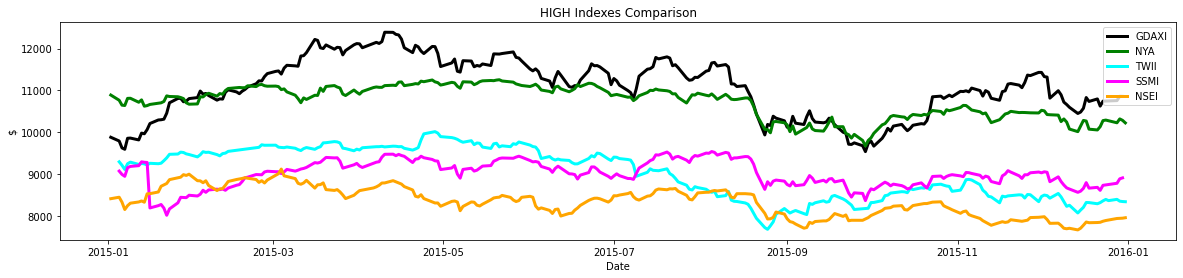

In [121]:
plt.figure(figsize=(20,4))
plt.plot(GDAXI['Date'], GDAXI['High'], label='GDAXI', linewidth=3, color='black', linestyle='-')
plt.plot(NYA['Date'], NYA['High'], label='NYA', linewidth=3, color='green', linestyle='-')
plt.plot(TWII['Date'], TWII['High'], label='TWII', linewidth=3, color='#00ffff', linestyle='-')
plt.plot(SSMI['Date'], SSMI['High'], label='SSMI', linewidth=3, color='#ff00ff', linestyle='-')
plt.plot(NSEI['Date'], NSEI['High'], label='NSEI', linewidth=3, color='orange', linestyle='-')

plt.ylabel('$')
plt.xlabel('Date')
plt.title('HIGH Indexes Comparison')
plt.legend()
plt.show()

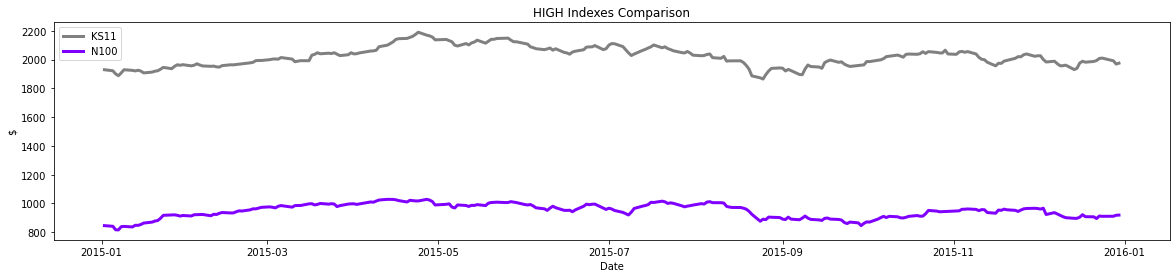

In [119]:
plt.figure(figsize=(20,4))
plt.plot(KS11['Date'], KS11['High'], label='KS11', linewidth=3, color='grey', linestyle='-')
plt.plot(N100['Date'], N100['High'], label='N100', linewidth=3, color='#8000ff', linestyle='-')

plt.ylabel('$')
plt.xlabel('Date')
plt.title('HIGH Indexes Comparison')
plt.legend()
plt.show()